In [54]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt

df_users = pd.read_json(os.path.join(sys.path[0], 'src', 'users-data', 'users.json'))

df_users


,Aragorn,Merry,Frodo,Galadriel
nombre,Elessar,Meriadoc,Frodo,Galadriel
edad,210,97,53,2105
genero,Masculino,Masculino,Masculino,Femenino


In [55]:

df = pd.read_csv(os.path.join(sys.path[0], 'src', 'log', 'users_logs.csv'), encoding='utf-8')

df

,User,Action,Time,Values,Texts
0,Aragorn,Creo nuevo perfil.,05-06-23 13:52:55,NaN,NaN
1,Aragorn,Abrió la ventana de etiquetas pero no generó e...,05-06-23 13:53:11,NaN,NaN
2,Aragorn,Entró a ventana de configuracion y generó camb...,05-06-23 13:53:31,NaN,NaN
3,Aragorn,Modificó información en las imágenes del direc...,05-06-23 13:54:12,NaN,NaN
4,Aragorn,Guardó información nueva en las imágenes del d...,12-06-23 13:54:44,NaN,NaN
5,Aragorn,Guardó información nueva en las imágenes del d...,13-06-23 13:54:44,NaN,NaN
6,Aragorn,Guardó información nueva en las imágenes del d...,14-06-23 13:54:44,NaN,NaN
7,Aragorn,Guardó información nueva en las imágenes del d...,05-06-23 13:57:06,NaN,NaN
8,Aragorn,Guardó información nueva en las imágenes del d...,05-06-23 13:57:34,NaN,NaN
9,Aragorn,Modificó información en las imágenes del direc...,05-06-23 13:58:12,NaN,NaN


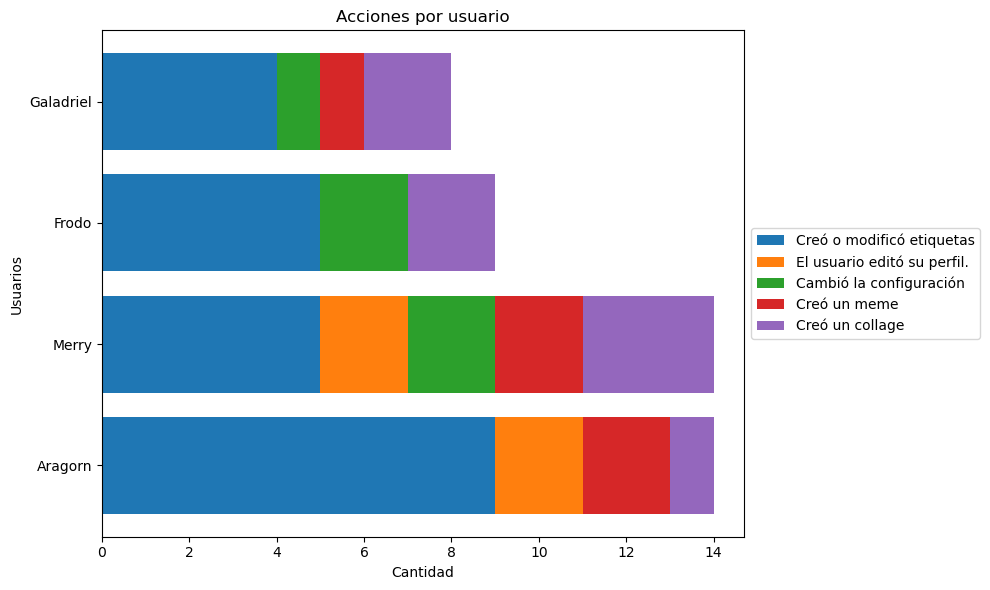

In [56]:


users = df["User"].unique()
etiquetas_nuevas = []
etiquetas_cambios = []
editoperfil = []
configuracion = []
memes = []
collage = []

for name in users:
    etiquetas_nuevas.append(df[(df["Action"] == "Guardó información nueva en las imágenes del directorio") & (df["User"] == name)]["Action"].count())
    etiquetas_cambios.append(df[(df["Action"] == "Modificó información en las imágenes del directorio") & (df["User"] == name)]["Action"].count())
    editoperfil.append(df[(df["Action"] == "El usuario editó su perfil.") & (df["User"] == name)]["Action"].count())
    configuracion.append(df[(df["Action"] == "Cambió la configuración") & (df["User"] == name)]["Action"].count())
    memes.append(df[(df["Action"] == "Creó un meme") & (df["User"] == name)]["Action"].count())
    collage.append(df[(df["Action"] == "Creó un collage") & (df["User"] == name)]["Action"].count())

etiquetas = [sum(x) for x in zip(etiquetas_nuevas, etiquetas_cambios)]


plt.figure(figsize=(10, 6))
plt.barh(users, etiquetas, label='Creó o modificó etiquetas')
plt.barh(users, editoperfil, left=etiquetas, label='El usuario editó su perfil.')
plt.barh(users, configuracion, left=[sum(x) for x in zip(etiquetas, editoperfil)], label='Cambió la configuración')
plt.barh(users, memes, left=[sum(x) for x in zip(etiquetas, editoperfil, configuracion)], label='Creó un meme')
plt.barh(users, collage, left=[sum(x) for x in zip(etiquetas, editoperfil, configuracion, memes)], label='Creó un collage')

plt.xlabel('Cantidad')
plt.ylabel('Usuarios')
plt.title('Acciones por usuario')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()  
plt.show()


[13, 2]


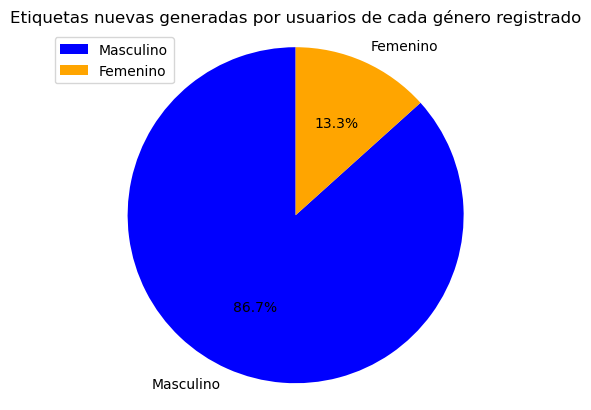

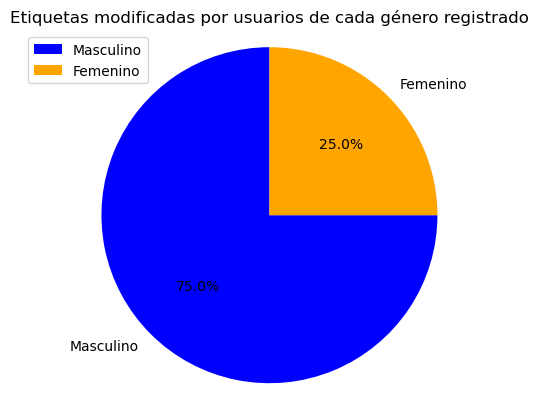

In [57]:
gens = []

for name in df["User"]:
    gens.append(df_users[name]["genero"])
df["Generos"] = gens

gen_unicos = df["Generos"].unique()

suma = []
for gen in gen_unicos:
    count = ((df["Generos"] == gen) & (df["Action"] == "Guardó información nueva en las imágenes del directorio")).sum()
    suma.append(count)
print(suma)
plt.pie(suma, labels=gen_unicos, colors=['blue', 'orange'], autopct='%1.1f%%', startangle=90)


plt.axis('equal')


plt.legend(loc='upper left')

plt.title("Etiquetas nuevas generadas por usuarios de cada género registrado")

plt.show()


suma = []
for gen in gen_unicos:
    count = ((df["Generos"] == gen) & (df["Action"] == "Modificó información en las imágenes del directorio")).sum()
    suma.append(count)

plt.pie(suma, labels=gen_unicos, colors=['blue', 'orange'], autopct='%1.1f%%', startangle=90)

plt.axis('equal')

plt.legend()

plt.title("Etiquetas modificadas por usuarios de cada género registrado")

plt.show()


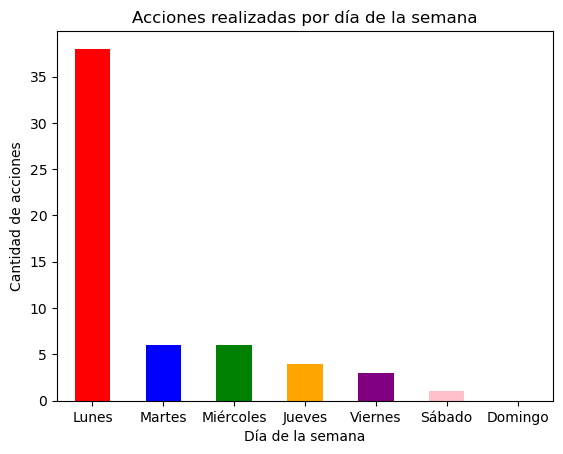

In [58]:
weekday_mapping = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
day_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%y %H:%M:%S')
df['DayOfWeek'] = df['Time'].dt.day_name().map(weekday_mapping)
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=day_order, ordered=True)

actions_by_day = df['DayOfWeek'].value_counts().sort_index()


actions_by_day.plot(kind='bar', color=["red", "blue", "green", "orange", "purple", "pink", "yellow"])


plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de acciones')
plt.title('Acciones realizadas por día de la semana')
plt.xticks(rotation=0)

plt.show()


In [156]:
df_tags = pd.read_csv(os.path.join(sys.path[0], 'src', 'users-data', 'tags.csv'), encoding='utf-8')

df_tags

,path,description,resolution,size,mimetype,tags,last user,last edit time
0,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,"Jim Morrison, cantante de The Doors","(1350, 759)",190.6 KB,image/jpeg,"['Morrison', 'Música', 'TheDoors']",Aragorn,05-06-23 13:54:41
1,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,NaN,"(550, 412)",58.4 KB,image/jpeg,"['Aconcagua', 'Montaña', 'Mendonza', 'Paisaje']",Aragorn,05-06-23 13:55:02
2,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,"Foto aerea de la ciudad de Napoles, en el sur ...","(875, 600)",117.1 KB,image/jpeg,"['Napoli', 'Paisaje', 'Ciudad', 'Italia']",Aragorn,05-06-23 13:55:33
3,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,NaN,"(800, 488)",171.5 KB,image/jpeg,"['Bilardo', 'Estudiantes', 'Gatorade', 'Futbol']",Aragorn,05-06-23 13:55:53
4,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,"Foto de las Cataratas del Iguazú en Misiones, ...","(276, 182)",11.5 KB,image/jpeg,"['Iguazú', 'Cataratas', 'Paisaje', 'Argentina']",Aragorn,05-06-23 13:56:29
5,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,Maradona jugando en la seleccion de Argentina,"(1066, 1280)",116.7 KB,image/jpeg,"['Diego', 'Fútbol', 'Mundial']",Aragorn,05-06-23 13:57:03
6,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,Foto del cantautor cubano Silvio Rodriguez con...,"(650, 650)",41.0 KB,image/jpeg,"['SilvioRodriguez', 'Música', 'Cuba']",Aragorn,05-06-23 13:57:31
7,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,"Anilló Único, El Señor de los Anillos","(318, 159)",9.1 KB,image/jpeg,"['LOTR', 'Peliculas', 'Anillo']",Aragorn,05-06-23 13:58:10
8,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,Lionel Messi con la Copa del Mundo en el Mundi...,"(1200, 900)",69.6 KB,image/jpeg,"['Messi', 'Campeon', 'Fútbol', 'Qatar']",Aragorn,05-06-23 13:58:39
9,/home/mceli/ssd/Doctorado/Curso_python/UNLPIma...,Foto de Maradona joven,"(670, 670)",96.0 KB,image/png,"['Diego', 'Fútbol', 'Maradona']",Frodo,15-06-23 13:58:39


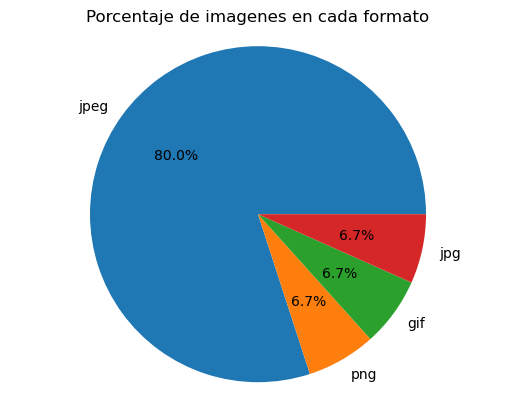

In [72]:
category_counts = df_tags['mimetype'].value_counts(normalize=True) * 100
categories_unique = df_tags['mimetype'].unique()
names = []

for text in categories_unique:
    names.append(text.split("/")[1])

plt.pie(category_counts, labels=names, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Porcentaje de imagenes en cada formato')

plt.show()

In [106]:
import re

resolutions = df_tags['resolution'].tolist()

first_elements = [int(re.findall(r'\((\d+)', res)[0]) for res in resolutions]

max_value_height = max(first_elements)
min_value_height = min(first_elements)

last_elements = [int(re.findall(r'\(\d+, (\d+)\)', res)[0]) for res in resolutions]

max_value_wide = max(last_elements)
min_value_wide = min(last_elements)

print('Máximo alto: '+str(max_value_height))

print('Máximo ancho: '+str(max_value_wide))

Máximo alto: 1350
Máximo ancho: 1280


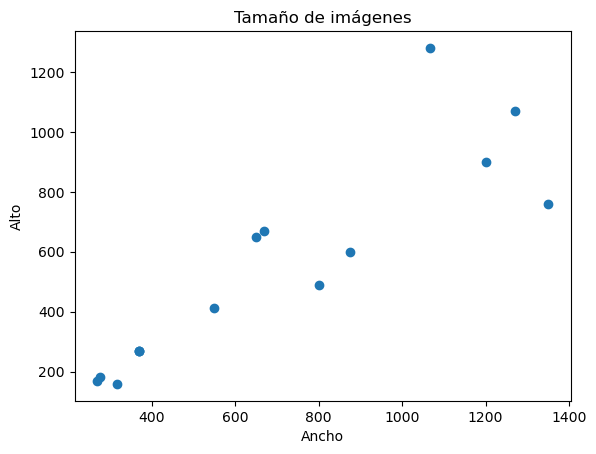

In [110]:
plt.scatter(first_elements,last_elements)

plt.title('Tamaño de imágenes')
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

In [173]:
import ast
from collections import Counter
tags = []
tags_aux = df_tags['tags'].tolist()

for t in tags_aux:
    tags.append(ast.literal_eval(t))

single_list = [item for sublist in tags for item in sublist]

count = Counter(single_list)
top = count.most_common(3)

top

[('Paisaje', 3), ('Fútbol', 3), ('Fantasía', 3)]